# Lab 4 - ML Experiments in Python
- **Author:** Suraj R. Nair ([suraj.nair@berkeley.edu](mailto:suraj.nair@berkeley.edu)) (based on labs from Emily Aiken, Dimitris Papadimitriou and Guanghua Chi)
- **Date:** February 7, 2022
- **Course:** INFO 251: Applied machine learning

## Learning objectives:
At the end of this lab, you will be able to...
- Implement random train-test splits and cross validation in numpy and pandas
- Use built-in scikit-learn functionality for train-test splits and cross validation
- Understand the difference between normalization and standardization

## Topics:
1. Vectorized computation, revisited
2. Train-test splits
3. Cross validation
4. Normalization and standardization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1. Vectorized Computation, Revisited

Challenge: For each point in a random set of 2D points, find the index of the closest other point in terms of Euclidean distance. *Use a maximum of one for loop.*

In [ ]:
np.random.seed(2)
points = np.random.rand(100, 2)

fig, ax = plt.subplots(1)
ax.scatter(points[:, 0], points[:, 1])
plt.show()

In [ ]:
# Solution: Bad example
closest_points = []
for i in range(len(points)):
    x1, y1 =  points[i, :]         
    dists = []
    for j in range(len(points)):
        if j == i: # do not compare with itself
            dists.append(np.inf)
        if j != i: 
            x2, y2 = points[j, :]                   
            
            dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)                           
            dists.append(dist)
    closest_points.append(np.argmin(dists))

In [ ]:
# Solution: Good example
closest_points = []
for i in range(len(points)):
    #### COMPLETE THIS LINE BELOW
    dists = 
    dists[i] = np.inf
    closest_points.append(np.argmin(dists))

## 2. Random Splits

In [ ]:
df = pd.read_csv('auto.csv')
df.head()


#### Option 1: Shuffling in numpy
This is what you should be using for your problem sets! 

In [ ]:
train_percent = .80
train_number = int(train_percent*len(df))
test_number = len(df) - train_number
print('Total examples: %i' % len(df))
print('Number of training examples: %i' % train_number)
print('Number of testing examples: %i' % test_number)

np.random.seed(12)

### SHUFFLE DATAFRAME
ids = np.arange(0, len(df), 1)
np.random.shuffle(ids) # What's weird about this syntax?
df_shuffled = df.iloc[ids]

### COMPLETE: SPLIT INTO TRAIN AND TEST


#### Option 2: Shuffling in pandas
**Do not use** in PS3 or PS4, but could be useful in future data science applications.

In [ ]:
df_shuffled = df.sample(frac=1, random_state=12)

test_pandas = df_shuffled[:test_number]
train_pandas = df_shuffled[test_number:]



#### Option 3: Built-in functionality in scikit-learn
Often most convenient -- you will see this line of code below a LOT. Please **do not use** built-in sklearn functionality in PS3 or PS4.

In [ ]:
train_sklearn, test_sklearn = train_test_split(df, train_size=train_percent, shuffle=True, random_state=12)

In [ ]:
x = df[['mpg', 'cylinders', 'year']]
y = df['weight']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_percent, shuffle=True, 
                                                    random_state=12)

## 3. Cross Validation

#### Option 1: Cross validation in numpy
**Challenge**: Extract five random cross validation splits from our dataframe using numpy's shuffle()

In [ ]:
# Solution 
np.random.seed(42)

### COMPLETE: Shuffle the dataframe


### COMPLETE: Generate Splits


#### Option 2: Cross validation in pandas
**Challenge**: Extract five random cross validation splits from our dataframe using pandas sample(). 

**Do not use** in PS3 or PS4, but could be useful in future data science applications.

In [ ]:
# Solution

# COMPLETE: use df.sample


# COMPLETE: Generate splits


#### Option 3: Built-in functionality in scikit-learn
Once again, do not use sci-kit learn on PS3 or PS4

In [ ]:
# KFold -- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
kf = KFold(n_splits=5, random_state=42, shuffle = True)
for train_idx, test_idx in kf.split(df):
    train, test = df.iloc[train_idx], df.iloc[test_idx]
    print(test['mpg'].mean(), train['mpg'].mean())

In [ ]:
# Cross validate -- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
x = df[['mpg', 'cylinders', 'year']]
y = df['weight']
model = LinearRegression()
cross_validate(model, x, y, scoring='r2', cv=5)

### Exercise: (Almost) 3 fold cross validation

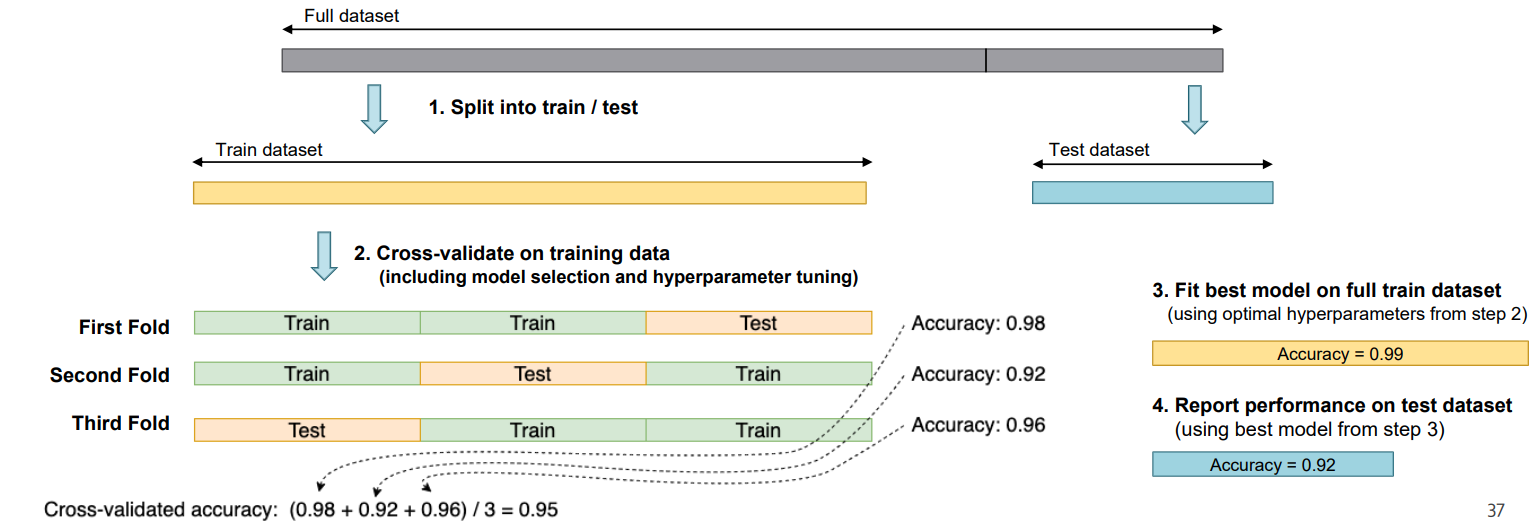

 - Load the auto.csv file
 - Separate the data (at random) into train, validation, and test sets (70 / 20 / 10)
 - Extract 3 splits from the train set
 - Iterate over the train set (3 folds), assigning 2 of the splits to "train", and 1 split to "test" each time. 
     - In each fold, calculate the mean of mpg in "train" and "test".

## 4. Normalization and Standardization

In [ ]:
df_numeric = df[['mpg', 'cylinders', 'weight']]
train, test = train_test_split(df_numeric, test_size=0.8, random_state=1, shuffle=True)

mpg_train = train['mpg'].values
mpg_test = test['mpg'].values

#### Standardization
Standardization rescales the values in a vector to 0 mean and unit variance.

In [ ]:
# Standardization by hand in numpy
mean_mpg, std_mpg = np.mean(mpg_train), np.std(mpg_train)

mpg_train_standardized = (mpg_train - mean_mpg)/std_mpg
mpg_test_standardized = (mpg_test - mean_mpg)/std_mpg

print(mpg_train_standardized.mean(), mpg_train_standardized.std())
print(mpg_test_standardized.mean(), mpg_test_standardized.std())

In [ ]:
# Standardization with scikit-learn
scaler = StandardScaler()
train_standardized = scaler.fit_transform(mpg_train.reshape(-1, 1))
test_standardized = scaler.transform(mpg_test.reshape(-1, 1))

In [ ]:
print(train_standardized.mean(), train_standardized.std())
print(test_standardized.mean(), test_standardized.std())

#### Normalization
Normalization rescales the values in a vector to a range of [0, 1].

In [ ]:
# Normalization by hand in numpy
max_mpg, min_mpg = np.max(mpg_train), np.min(mpg_train)

mpg_train_normalized = (mpg_train - min_mpg)/(max_mpg - min_mpg)
mpg_test_normalized = (mpg_test - min_mpg)/(max_mpg - min_mpg)

print(mpg_train_normalized.min(), mpg_train_normalized.max())
print(mpg_test_normalized.min(), mpg_test_normalized.max())

In [ ]:
# Normalization in scikit-learn
scaler = MinMaxScaler()
train_normalized = scaler.fit_transform(mpg_train.reshape(-1, 1))
test_normalized = scaler.transform(mpg_test.reshape(-1, 1))

print(train_normalized.min(), train_normalized.max())
print(test_normalized.min(), test_normalized.max())

Compare the raw data, and the normalized data

In [ ]:
test

In [ ]:
test_normalized